In [113]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2


def convert_to_gray(image):
    if len(image.shape) == 2:
        return image
    gray_image = np.mean(image, axis=2).astype(np.uint8)
    return gray_image

In [114]:
def cal_psnr(image1, image2):
    image1 = np.float64(image1)
    image2 = np.float64(image2)
    mse = np.mean((image1-image2) ** 2)
    
    if mse == 0:
        return float('inf')
    
    psnr = 20*np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

In [115]:
def add_gaussian_noise(img, mean=0, stddev=1):
    gaussian_noise = np.random.normal(mean, stddev, img.shape).astype(np.uint8)
    noisy_image = cv2.add(img, gaussian_noise)
    plt.imshow(noisy_image, cmap='gray')
    return noisy_image.astype(np.uint8)

In [116]:
def apply_butterworth_filter(image, order, cutoff_frequency):
    height, width = image.shape
    butterworth_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            butterworth_filter[u, v] = 1 / (1 + (D / cutoff_frequency)**(2 * order))

    filtered_image = image * butterworth_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))
    return np.abs(filtered_image)

In [117]:
def apply_gaussian_filter(image, cutoff_freq):
    height, width = image.shape
    gaussian_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            gaussian_filter[u, v] = np.exp(-(D**2) / (2 * (cutoff_freq**2)))

    filtered_image = image * gaussian_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))
    return np.abs(filtered_image)

In [118]:
rgb_image = plt.imread('lena.jpg')
img = convert_to_gray(rgb_image)


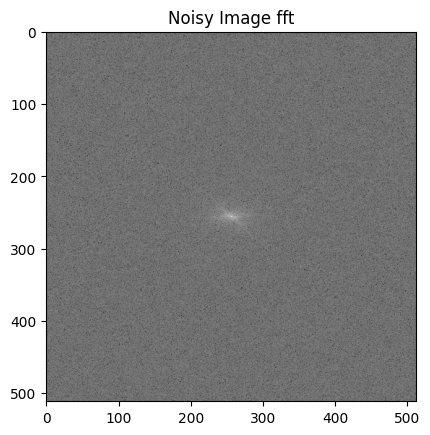

In [119]:
noisy_image = add_gaussian_noise(img, 0, 5)
noisy_image_psnr = cal_psnr(img, noisy_image)
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_image))
plt.imshow(np.log(np.abs(noisy_image_fft)), cmap='gray')
plt.title("Noisy Image fft")
plt.show()

In [120]:
b_filtered_image = apply_butterworth_filter(noisy_image_fft, 4, 30)
b_filtered_image_psnr = cal_psnr(img, b_filtered_image)
g_filtered_image = apply_gaussian_filter(noisy_image_fft, 30)
g_filtered_image_psnr = cal_psnr(img, g_filtered_image)

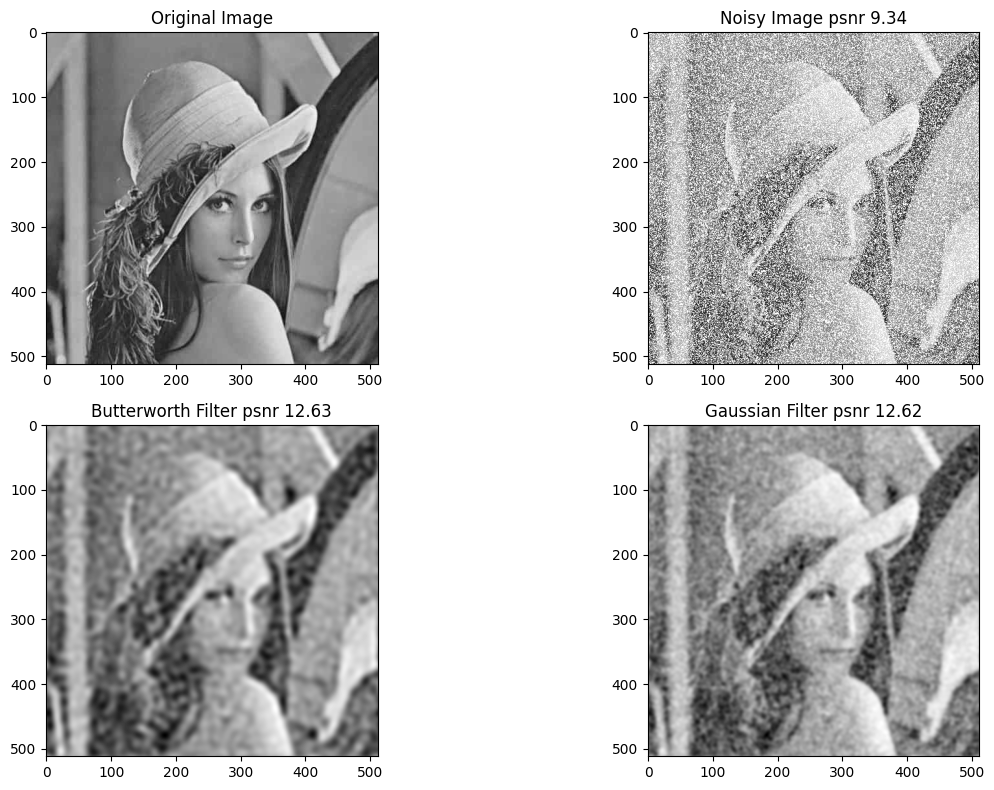

In [121]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image psnr {noisy_image_psnr}')
plt.tight_layout()
plt.subplot(2, 2, 3)
plt.imshow(b_filtered_image, cmap='gray')
plt.title(f'Butterworth Filter psnr {b_filtered_image_psnr}')
plt.subplot(2, 2, 4)
plt.imshow(g_filtered_image, cmap='gray')
plt.title(f'Gaussian Filter psnr {g_filtered_image_psnr}')
plt.tight_layout()
plt.show()